<a href="https://colab.research.google.com/github/Integrall11/RNN-pyhthon-implementation/blob/main/Main%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, SimpleRNN, Dropout, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

Check if a simple fully connected neural network can predict a sequence of orderd 5 numbers

In [8]:
#create our dataset
X_train = np.array(range(1, 2001)).reshape(400, 5, 1)
y_train = np.array([5*x +1 for x in range(1, 401)]).reshape(400, 1)
X_test = np.array(range(3000, 3100)).reshape(20, 5, 1)
y_test = np.arange(3005, 3105, 5).reshape(20, 1)
print('X_train =\n', X[:5])
print('y_train =\n', y[:5])
print('X_test =\n', test[-5:])
print('y_test =\n', y_test[-5:])

X_train =
 [[[ 1]
  [ 2]
  [ 3]
  [ 4]
  [ 5]]

 [[ 6]
  [ 7]
  [ 8]
  [ 9]
  [10]]

 [[11]
  [12]
  [13]
  [14]
  [15]]

 [[16]
  [17]
  [18]
  [19]
  [20]]

 [[21]
  [22]
  [23]
  [24]
  [25]]]
y_train =
 [[ 6]
 [11]
 [16]
 [21]
 [26]]
X_test =
 [[[3075]
  [3076]
  [3077]
  [3078]
  [3079]]

 [[3080]
  [3081]
  [3082]
  [3083]
  [3084]]

 [[3085]
  [3086]
  [3087]
  [3088]
  [3089]]

 [[3090]
  [3091]
  [3092]
  [3093]
  [3094]]

 [[3095]
  [3096]
  [3097]
  [3098]
  [3099]]]
y_test =
 [[3080]
 [3085]
 [3090]
 [3095]
 [3100]]


In [ ]:
#define function to dreate a simple fully connected layer
def creat_FC(hidden_layers, hidden_units=10, activation='linear'):
  model = Sequential()
  model.add(Dense(units=5, activation=activation))

  for _ in range(hidden_layers):
    model.add(Dense(units=hidden_units, activation=activation))
  
  model.add(Dense(units=3, activation=activation))
  model.add(Dense(units=1, activation='softmax'))
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

fc = creat_FC(5)
fc.fit(X_train, y_train, epochs=40, batch_size=1)

In [ ]:
#check the model performance on the test data
fc_predict = fc.predict(X_test)
fc_predict

As it can be seen no matter how to tune the hyperparameters (batch_size, epochs, number of hidden layers or ativation function) a FC NN can not make predictions on a data with no higher representation or and linear relationship between each feature (first element of any 5 sequence are considered a features and the same for any seconde and third etc)
NoW we use a simple recurrent network and instead of feeding this 5 sequence as 5 features we feed as a sequence of one feature (a concept that is not defined in the simple neural networks with no memory)

In [23]:
#define a function to create RNN
def create_RNN(hidden_units, dense_units, input_shape, activation, RNN='simple'):
  model = Sequential()
  if RNN == 'simple':
    model.add(SimpleRNN(units=hidden_units, activation=activation[0], input_shape=input_shape))
  elif RNN == 'LSTM':
    model.add(LSTM(units=hidden_units, input_shape=input_shape))
  else:
    raise ValueError('Value for type of RNN is not valid; valid')
  
  model.add(Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

model = create_RNN(1, 1, (5, 1), ['linear', 'linear'])

In [ ]:
#train the simple RNN model
model.fit(X_train, y_train, epochs=50, batch_size=1)

In [ ]:
#print trained weight
weights = model.get_weights()
print('wx =\n', weights[0])
print('wh = \n', weights[1])
print('bh =\n', weights[2])
print('wy = \n', weights[3])
print('by = \n', weights[4])

In [ ]:
#test the simple RNN model on a new data
model.predict(X_test)

If we play wiht different hyperparamters it can be seen that a simpler RNN with fewer ruccurent units actually performs better. we can also try different activation fuctions. Linear is fine

In [10]:
#get data and split it into train and test
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

def get_train_test(url, test_size=0.2): 
  df = pd.read_csv(url, usecols=[1], engine='python')
  data = df.values.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data)
  train, test = train_test_split(data, test_size=test_size, shuffle=False)
  return train, test

train, test = get_train_test(url)

In [11]:
#get X and y for train and test data
def get_XY(data, timeStep):  
  y_idx = np.arange(timeStep, data.shape[0], timeStep)
  y = data[y_idx]
  X = data[:timeStep*y.shape[0]]
  X = X.reshape(-1, timeStep, 1)
  return X, y

X_train, y_train = get_XY(train, 12)
X_test, y_test = get_XY(test, 12)
print(f'X_train shape = {X_train.shape}; X_test shape = {X_test.shape}; y_train shape = {y_train.shape}; y_test shape = {y_test.shape}')

X_train shape = (187, 12, 1); X_test shape = (46, 12, 1); y_train shape = (187, 1); y_test shape = (46, 1)


In [27]:
#define a function to train, test and visulize the model to play with different parameters more easily
def train_test_vis(rnn_units, X_train, y_train, X_test, y_test, rnn_activation='linear', dense_activation='linear', epochs=15, batch_size=1, verbose=0, RNN_type='simple'):
  model = create_RNN(rnn_units, 1, (12, 1), [rnn_activation, dense_activation], RNN=RNN_type)
  model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
  test_pred = model.predict(X_test)
  MSE = mean_squared_error(y_test, test_pred)
  print(f'test MSE = {MSE}')
  plt.figure(figsize=(5, 3))
  plt.plot(range(y_test.shape[0]), y_test, label='test data')
  plt.plot(range(y_test.shape[0]), test_pred, label='predicted')
  plt.legend()
  plt.show()
  return MSE, test_pred

2/2 [==============================] - 0s 8ms/step
test MSE = 0.007048419211059809


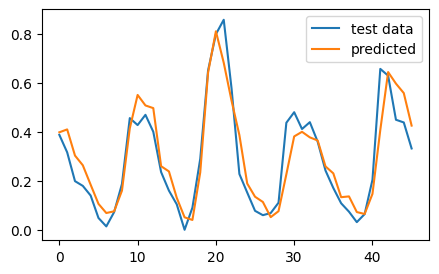

In [31]:
MSE, prdictions = train_test_vis(1, X_train, y_train, X_test, y_test, rnn_activation='linear', dense_activation='linear')

In [ ]:
MSE, prdictions = train_test_vis(4, X_train, y_train, X_test, y_test)

In [ ]:
MSE, prdictions = train_test_vis(32, X_train, y_train, X_test, y_test, epochs=100, rnn_activation='tanh', dense_activation='tanh')

After trying different parameters it does seem that tanh and linear activation function doesn't differ that much and more rnn units seem to deliver more consitent (and lower loss) results but the difference is negligible

Epoch 1/20
187/187 [==============================] - 3s 5ms/step - loss: 0.0089
Epoch 2/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0054
Epoch 3/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0051
Epoch 4/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0055
Epoch 5/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 6/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0045
Epoch 7/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 8/20
187/187 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 9/20
187/187 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 10/20
187/187 [==============================] - 1s 6ms/step - loss: 0.0038
Epoch 11/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0040
Epoch 12/20
187/187 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 13/20
187/187 [====

2/2 [==============================] - 0s 9ms/step
test MSE = 0.008030450902879238


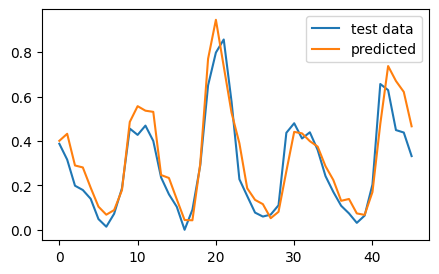

In [29]:
MSE, prediction = train_test_vis(32, X_train, y_train, X_test, y_test, RNN_type='LSTM', verbose=1, epochs=20)